In [ ]:
# 10 Task: Apply Principal Component Analysis to reduce the dimensionality of the dataset.
#New dataset: Employee Job Satisfaction
data = pd.read_csv("employee.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

Transformed Dataset:
   Email ID  Free (E)  Win (F)  Age  Income  Spam (H)
0         1         1        0   23   50000         1
1         2         0        1   45   60000         0
2         3         1        1   34   70000         1
3         4         0        0   50   55000         0
4         5         1        0   30   48000         1

Data after PCA (2D):
[[ 1.93658881  0.19097872]
 [-1.86950892 -0.20585894]
 [-0.89934126  2.03933974]
 [-0.84032372 -1.77700073]
 [ 1.6725851  -0.24745879]]


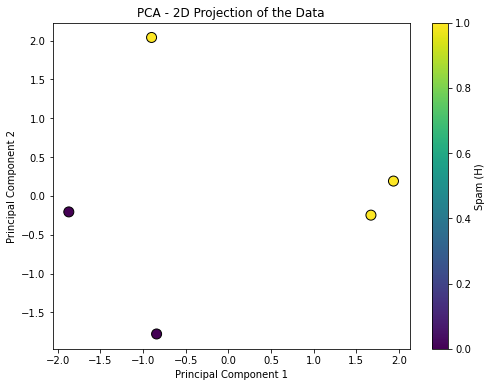

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Email ID': [1, 2, 3, 4, 5],
    'Free (E)': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Win (F)': ['No', 'Yes', 'Yes', 'No', 'No'],
    'Age': [23, 45, 34, 50, 30],
    'Income': [50000, 60000, 70000, 55000, 48000],
    'Spam (H)': ['Spam', 'Not Spam', 'Spam', 'Not Spam', 'Spam']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data into numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Free (E)'] = label_encoder.fit_transform(df['Free (E)'])
df['Win (F)'] = label_encoder.fit_transform(df['Win (F)'])
df['Spam (H)'] = label_encoder.fit_transform(df['Spam (H)'])  # Target column

# Show the transformed dataset
print("Transformed Dataset:")
print(df)

# Features for PCA (excluding the target column 'Spam (H)')
X = df[['Free (E)', 'Win (F)', 'Age', 'Income']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Show the transformed data after PCA
print("\nData after PCA (2D):")
print(X_pca)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Spam (H)'], cmap='viridis', edgecolor='k', s=100)
plt.title('PCA - 2D Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Spam (H)')
plt.show()
